# 00: Exploratory Data Analysis

This notebook provides an initial exploration of the auto insurance dataset to:
- Understand data quality and completeness
- Identify demographic distributions and potential bias patterns
- Explore relationships between features and the target variable
- Inform preprocessing decisions

In [1]:
# Check if running in Google Colab
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

# Install dependencies (for Google Colab)
if IN_COLAB:
    !pip install fairlearn seaborn -q

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Set random seed for reproducibility
np.random.seed(42)

# Create results directory if it doesn't exist (for saving visualizations)
Path('../results').mkdir(exist_ok=True)

## 1. Setup & Load Data

### 1.1 Google Drive Mount (Optional - for Colab only)
If running in Google Colab and data is stored in Google Drive, uncomment the following cell.


In [ ]:
# Uncomment the following lines if you need to mount Google Drive in Colab
# from google.colab import drive
# drive.mount('/content/drive')

### 1.2 Load Dataset

In [3]:
# Load the dataset
# Option 1: Load from local directory (works for both local and Colab after upload)
try:
    file_path = '../data/AutoInsurance.csv'
    df = pd.read_csv(file_path)
    print(f"✓ Successfully loaded data from {file_path}")
except FileNotFoundError:
    # Option 2: Load from Colab content directory (after manual upload)
    try:
        file_path = '/content/AutoInsurance.csv'
        df = pd.read_csv(file_path)
        print(f"✓ Successfully loaded data from {file_path}")
    except FileNotFoundError:
        print(f"Error: The file was not found.")
        print("For local: Ensure '../data/AutoInsurance.csv' exists")
        print("For Colab: Upload the file using the folder icon in the left sidebar")
except Exception as e:
    print(f"An error occurred while loading the CSV: {e}")

# Validate that data was loaded successfully
if 'df' not in locals():
    raise NameError("DataFrame 'df' was not created. Please check the file path and try again.")
else:
    print(f"\n✓ Data validation: DataFrame loaded successfully")
    print(f"   Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    if df.empty:
        raise ValueError("DataFrame is empty. Please check the data file.")

✓ Successfully loaded data from ../data/AutoInsurance.csv

✓ Data validation: DataFrame loaded successfully
   Shape: 9,134 rows × 24 columns


### 1.3 Data Inspection

In [4]:
# Data Inspection - Initial overview
if 'df' in locals():
    print("=" * 60)
    print("DATASET OVERVIEW")
    print("=" * 60)
    print(f"\nShape of the DataFrame: {df.shape}")
    print(f"Total records: {len(df):,}")
    print(f"Total columns: {len(df.columns)}")
    
    print("\n" + "=" * 60)
    print("COLUMN NAMES:")
    print("=" * 60)
    print(df.columns.tolist())
    
    print("\n" + "=" * 60)
    print("DATA TYPES AND NON-NULL VALUES:")
    print("=" * 60)
    df.info()
    
    print("\n" + "=" * 60)
    print("FIRST FEW ROWS:")
    print("=" * 60)
    print(df.head(10).to_string())
else:
    print("DataFrame 'df' not created. Please check the previous steps for file loading errors.")

DATASET OVERVIEW

Shape of the DataFrame: (9134, 24)
Total records: 9,134
Total columns: 24

COLUMN NAMES:
['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus', 'Gender', 'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size']

DATA TYPES AND NON-NULL VALUES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response      

## 2. Data Quality Assessment

### 2.1 Missing Values

In [5]:
# Check for missing values
if 'df' in locals():
    missing_values = df.isnull().sum()
    missing_percentage = (df.isnull().sum() / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Count': missing_values, 
        'Missing Percentage (%)': missing_percentage
    })
    # Filter to show only columns with missing values, and sort them
    missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False)
    
    if not missing_df.empty:
        print("\nMissing Values and their Percentages:")
        print(missing_df.to_string())
    else:
        print("✓ No missing values found in the DataFrame.")
else:
    print("DataFrame 'df' not created. Cannot check for missing values.")

✓ No missing values found in the DataFrame.


### 2.2 Duplicate Records

In [6]:
# Check for duplicate records
if 'df' in locals():
    num_duplicates = df.duplicated().sum()
    if num_duplicates > 0:
        print(f"⚠ Found {num_duplicates} duplicate record(s).")
        print("Displaying the first 5 duplicate rows:")
        print(df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist()).head().to_string())
    else:
        print("✓ No duplicate records found.")
else:
    print("DataFrame 'df' not created. Cannot check for duplicates.")

✓ No duplicate records found.


### 2.3 Outliers

Examine numerical columns for potential outliers using descriptive statistics.

Descriptive Statistics for Outlier Identification:

Column: Income
count     9134.000000
mean     37657.380009
std      30379.904734
min          0.000000
25%          0.000000
50%      33889.500000
75%      62320.000000
max      99981.000000


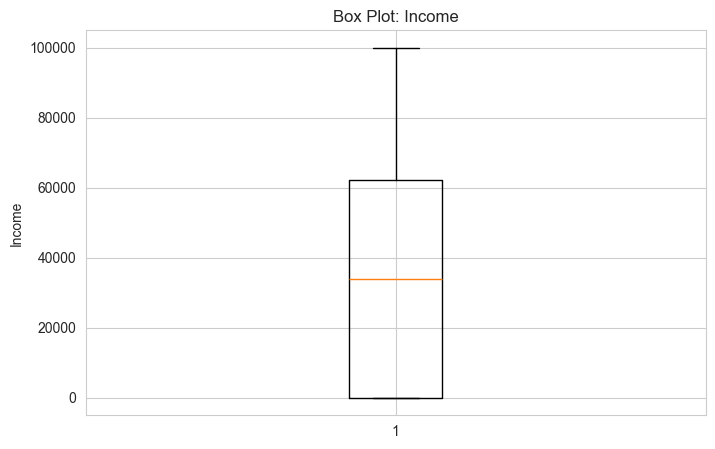


Column: Total Claim Amount
count    9134.000000
mean      434.088794
std       290.500092
min         0.099007
25%       272.258244
50%       383.945434
75%       547.514839
max      2893.239678


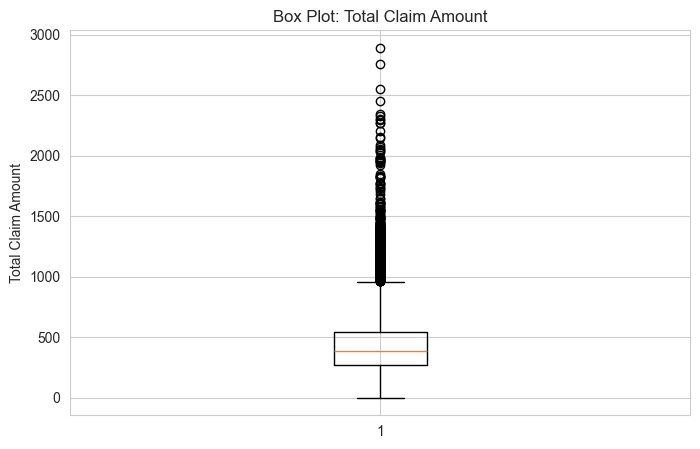


Column: Customer Lifetime Value
count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190


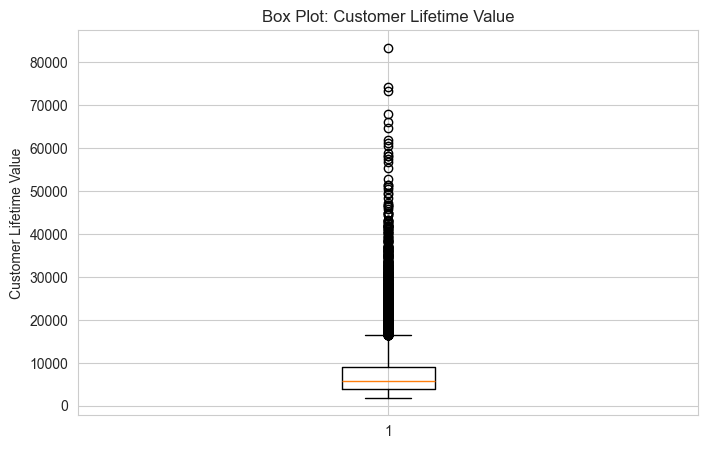

In [7]:
# Check for outliers in key numerical columns
if 'df' in locals():
    numerical_cols_for_outliers = ['Income', 'Total Claim Amount', 'Customer Lifetime Value']
    print(f"Descriptive Statistics for Outlier Identification:")
    for col in numerical_cols_for_outliers:
        if col in df.columns:
            print(f"\n{'='*60}")
            print(f"Column: {col}")
            print(f"{'='*60}")
            print(df[col].describe().to_string())
            
            # Box plot for visual outlier detection
            plt.figure(figsize=(8, 5))
            plt.boxplot(df[col].dropna())
            plt.title(f'Box Plot: {col}')
            plt.ylabel(col)
            plt.show()
        else:
            print(f"Column '{col}' not found in DataFrame.")
else:
    print("DataFrame 'df' not created. Cannot check for outliers.")

### 2.4 Data Types Verification

In [8]:
# Verify data types and identify numerical vs categorical columns
if 'df' in locals():
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    print("Numerical Columns:")
    print(numerical_cols)
    print(f"\nTotal: {len(numerical_cols)} numerical columns")
    
    print("\n" + "="*60)
    print("Categorical Columns:")
    print(categorical_cols)
    print(f"\nTotal: {len(categorical_cols)} categorical columns")
else:
    print("DataFrame 'df' not created. Cannot verify data types.")

Numerical Columns:
['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']

Total: 8 numerical columns

Categorical Columns:
['Customer', 'State', 'Response', 'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']

Total: 16 categorical columns


### 2.5 Unique Values (Cardinality) of Categorical Features

In [10]:
# Check cardinality of categorical features
if 'df' in locals():
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    print("Unique values (Cardinality) for Categorical Columns:")
    print("="*60)
    for col in categorical_cols:
        unique_count = df[col].nunique()
        print(f"\n{col}: {unique_count} unique values")
        # Display actual unique values if there are few
        if unique_count < 20:
            print(f"  Values: {df[col].unique().tolist()}")
        elif unique_count == len(df):
            print(f"  ⚠ Note: This appears to be a unique identifier (one value per row)")
else:
    print("DataFrame 'df' not created. Cannot check unique values.")

Unique values (Cardinality) for Categorical Columns:

Customer: 9134 unique values
  ⚠ Note: This appears to be a unique identifier (one value per row)

State: 5 unique values
  Values: ['Washington', 'Arizona', 'Nevada', 'California', 'Oregon']

Response: 2 unique values
  Values: ['No', 'Yes']

Coverage: 3 unique values
  Values: ['Basic', 'Extended', 'Premium']

Education: 5 unique values
  Values: ['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor']

Effective To Date: 59 unique values

EmploymentStatus: 5 unique values
  Values: ['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired']

Gender: 2 unique values
  Values: ['F', 'M']

Location Code: 3 unique values
  Values: ['Suburban', 'Rural', 'Urban']

Marital Status: 3 unique values
  Values: ['Married', 'Single', 'Divorced']

Policy Type: 3 unique values
  Values: ['Corporate Auto', 'Personal Auto', 'Special Auto']

Policy: 9 unique values
  Values: ['Corporate L3', 'Personal L3', 'Corporate L2', 'Person

## 3. Target Variable Analysis

TARGET VARIABLE DISTRIBUTION

Count distribution:
Response
No     7826
Yes    1308

Percentage distribution:
Response
No     85.679877
Yes    14.320123

Class Imbalance Ratio (Majority to Minority): 5.98
⚠ Warning: Significant class imbalance detected. Consider using class weights or resampling.


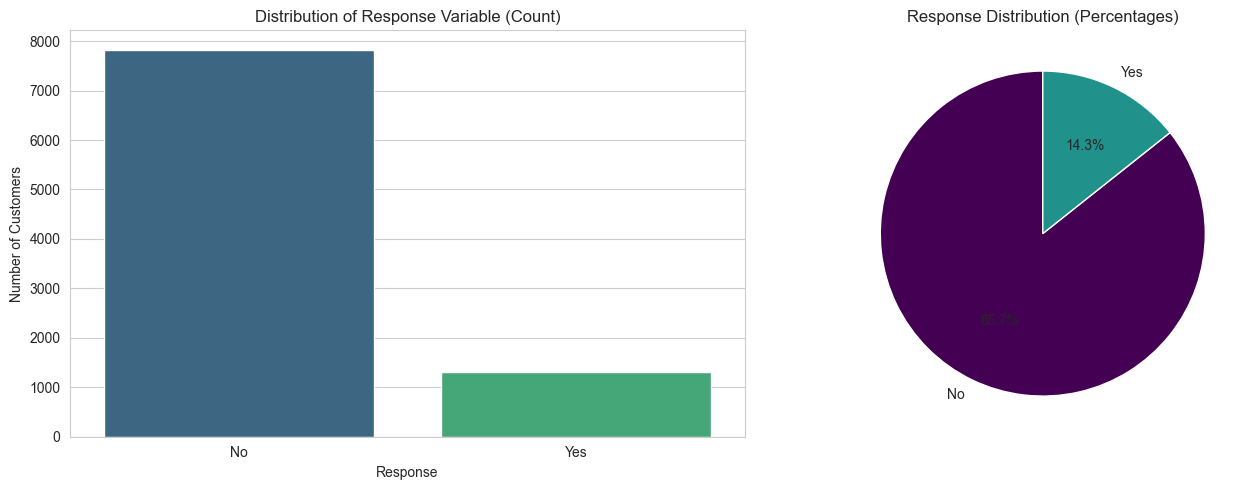

In [13]:
# Examine target variable (Response)
target_col = 'Response'

if 'df' in locals() and target_col in df.columns:
    print("="*60)
    print("TARGET VARIABLE DISTRIBUTION")
    print("="*60)
    
    response_distribution = df[target_col].value_counts()
    print("\nCount distribution:")
    print(response_distribution.to_string())
    
    response_percentage = df[target_col].value_counts(normalize=True) * 100
    print("\nPercentage distribution:")
    print(response_percentage.to_string())
    
    # Calculate class imbalance ratio
    if len(response_distribution) == 2:
        imbalance_ratio = response_distribution.max() / response_distribution.min()
        print(f"\nClass Imbalance Ratio (Majority to Minority): {imbalance_ratio:.2f}")
        if imbalance_ratio > 5:
            print("⚠ Warning: Significant class imbalance detected. Consider using class weights or resampling.")
    
    # Enhanced visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Count plot
    sns.countplot(x=target_col, data=df, hue=target_col, palette='viridis', legend=False, ax=axes[0])
    axes[0].set_title('Distribution of Response Variable (Count)')
    axes[0].set_ylabel('Number of Customers')
    axes[0].set_xlabel('Response')
    
    # Pie chart for percentages
    response_counts = df[target_col].value_counts()
    axes[1].pie(response_counts.values, labels=response_counts.index, autopct='%1.1f%%', 
                startangle=90, colors=['#440154', '#21918c'])
    axes[1].set_title('Response Distribution (Percentages)')
    
    plt.tight_layout()
    
    # Optional: Save visualization (uncomment to save)
    # fig.savefig('../results/target_variable_distribution.png', dpi=300, bbox_inches='tight')
    # print("\n✓ Visualization saved to '../results/target_variable_distribution.png'")
    
    plt.show()
else:
    print("DataFrame 'df' not created or 'Response' column not found. Cannot perform target variable analysis.")

## 4. Protected Attributes Identification

Identify and visualize demographic/socioeconomic attributes that may be sources of bias.

PROTECTED ATTRIBUTES: CATEGORICAL DISTRIBUTIONS


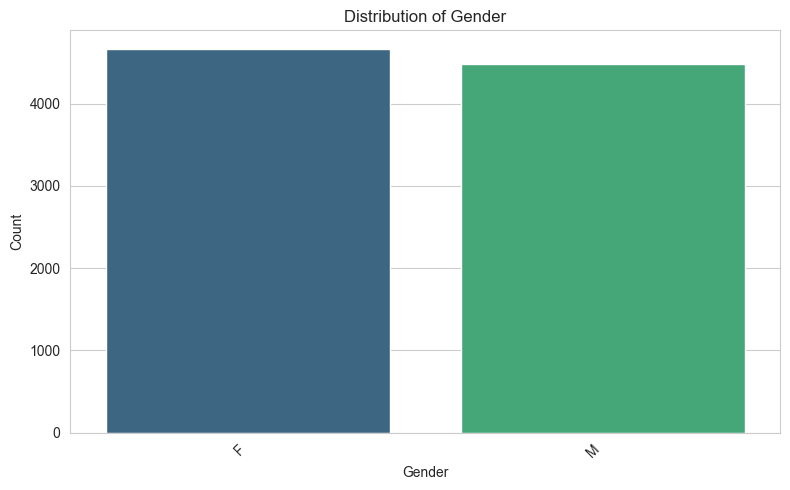

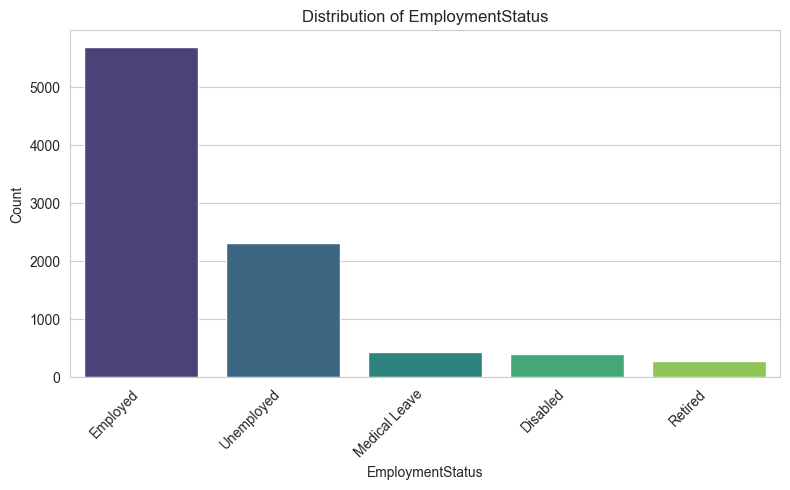

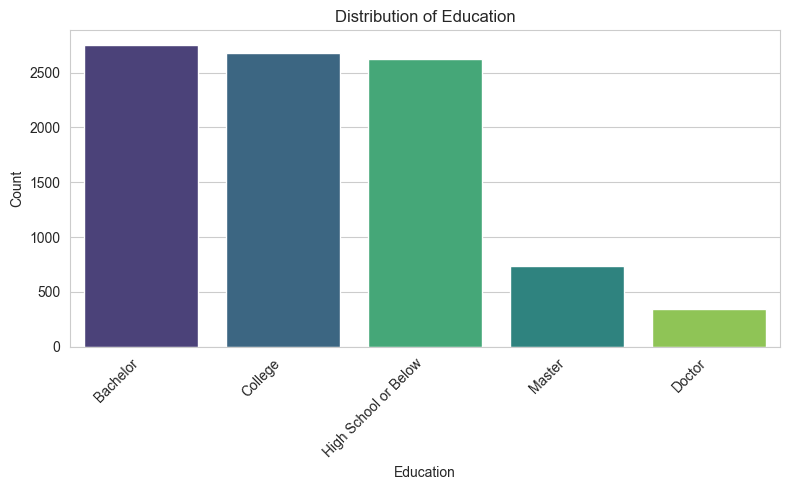

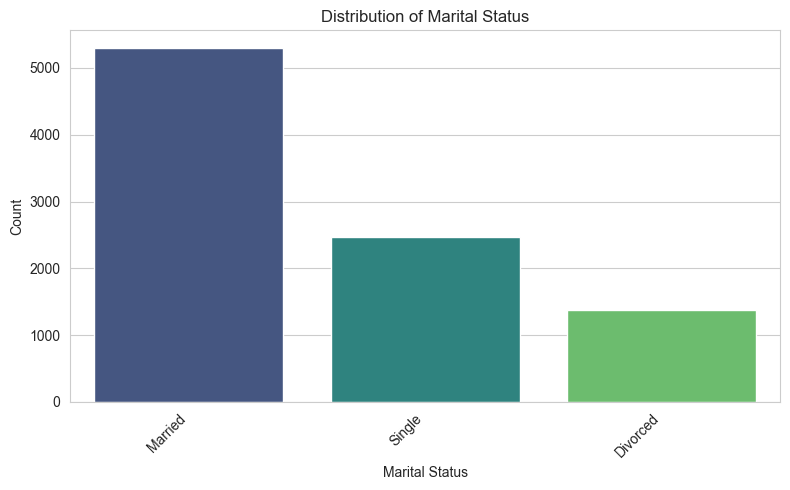

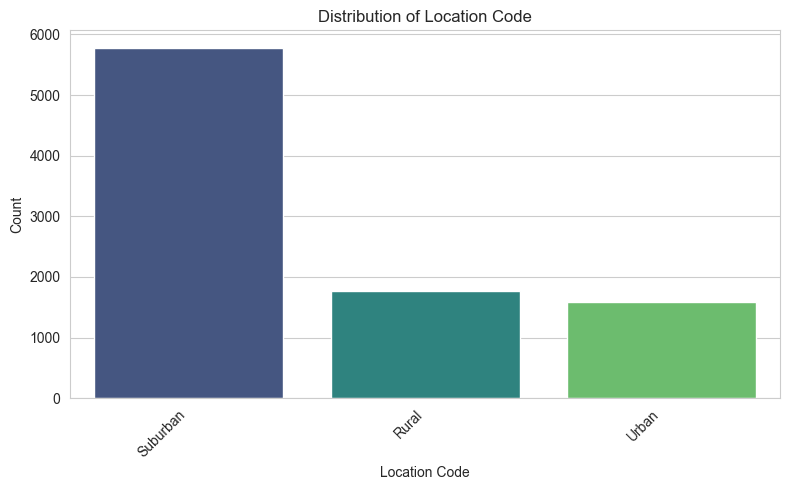

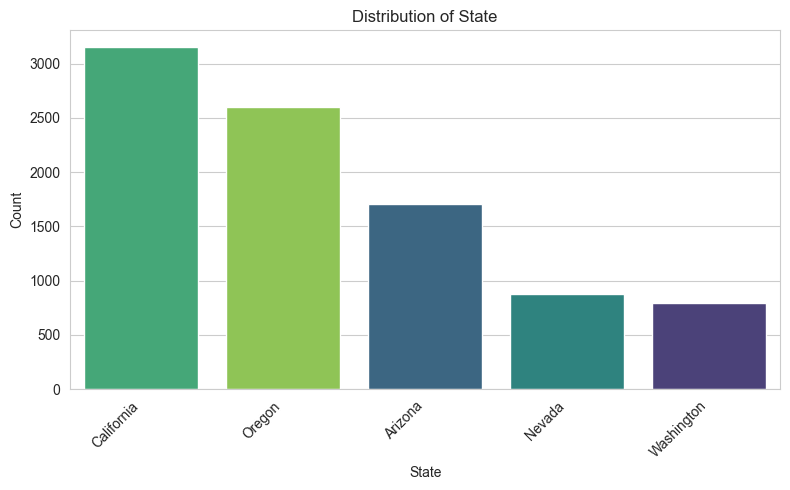


PROTECTED ATTRIBUTES: NUMERICAL DISTRIBUTIONS


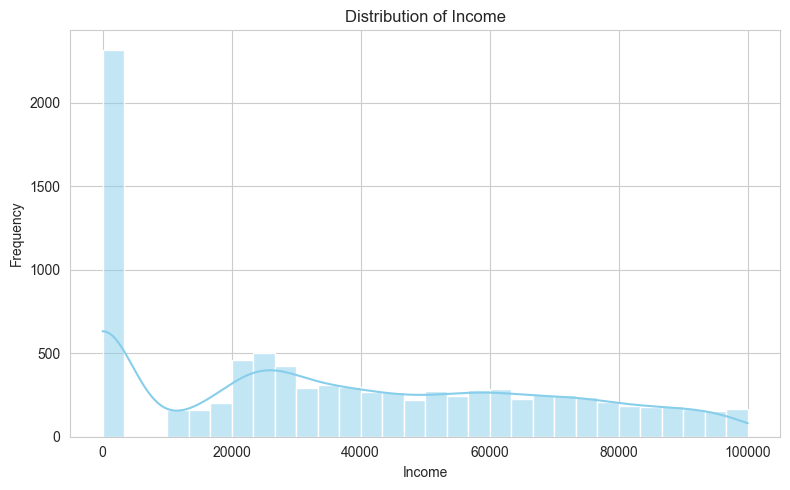

In [14]:
# Define protected attributes for fairness analysis
protected_attributes_categorical = [
    'Gender',                   # M/F - direct protected attribute
    'EmploymentStatus',         # Employed/Unemployed/etc. - socioeconomic status
    'Education',                # Educational attainment - socioeconomic
    'Marital Status',           # Marital status
    'Location Code',            # Urban/Suburban/Rural - potential proxy for SES
    'State'                    
]
protected_attributes_numerical = [
    'Income',
]

# Visualize distributions of categorical protected attributes
if 'df' in locals():
    print("="*60)
    print("PROTECTED ATTRIBUTES: CATEGORICAL DISTRIBUTIONS")
    print("="*60)
    
    for col in protected_attributes_categorical:
        if col in df.columns:
            plt.figure(figsize=(8, 5))
            sns.countplot(x=col, data=df, hue=col, palette='viridis', legend=False, order=df[col].value_counts().index)
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print(f"Column '{col}' not found in DataFrame.")
    
    print("\n" + "="*60)
    print("PROTECTED ATTRIBUTES: NUMERICAL DISTRIBUTIONS")
    print("="*60)
    
    for col in protected_attributes_numerical:
        if col in df.columns:
            plt.figure(figsize=(8, 5))
            sns.histplot(df[col], bins=30, kde=True, color='skyblue')
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.tight_layout()
            plt.show()
        else:
            print(f"Column '{col}' not found in DataFrame.")
else:
    print("DataFrame 'df' not created. Cannot visualize protected attributes.")

## 5. Cross-Tabulation Analysis

Analyze relationships between protected attributes and the target variable to identify potential bias patterns.

CROSS-TABULATION ANALYSIS: Protected Attributes vs Response

Analysis for Gender
Response Rates by Gender (%):
Response         No        Yes
Gender                        
F         85.830829  14.169171
M         85.522788  14.477212


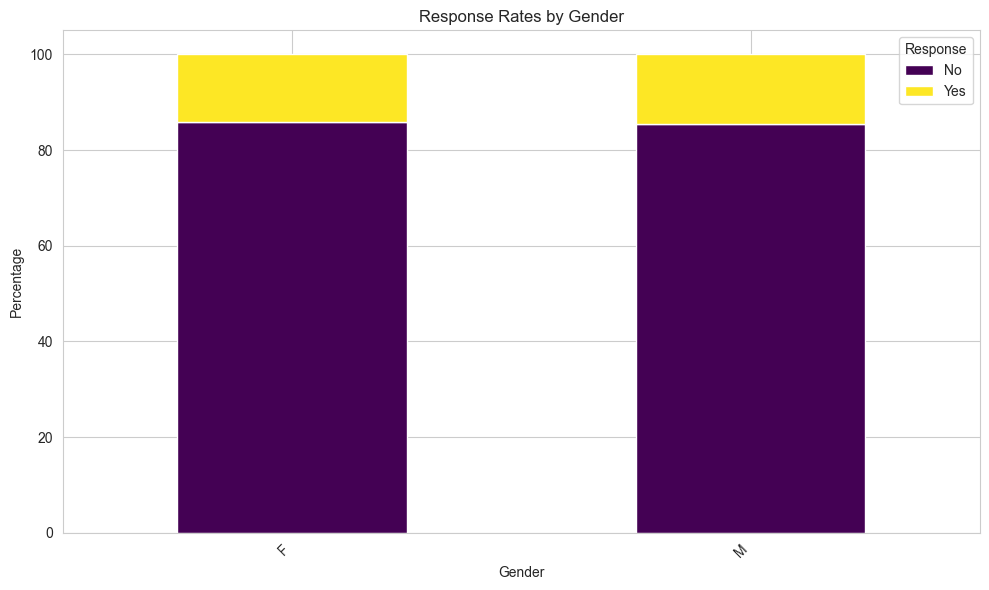


Analysis for EmploymentStatus
Response Rates by EmploymentStatus (%):
Response                 No        Yes
EmploymentStatus                      
Disabled          82.222222  17.777778
Employed          86.732187  13.267813
Medical Leave     81.944444  18.055556
Retired           27.659574  72.340426
Unemployed        91.454467   8.545533


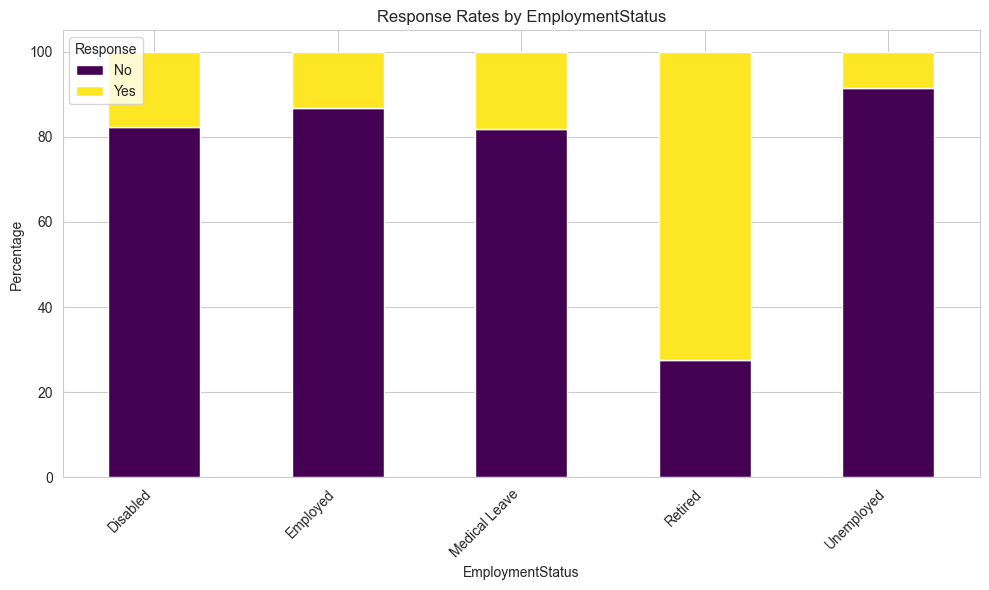


Analysis for Education
Response Rates by Education (%):
Response                     No        Yes
Education                                 
Bachelor              86.244541  13.755459
College               84.781798  15.218202
Doctor                82.456140  17.543860
High School or Below  86.956522  13.043478
Master                83.805668  16.194332


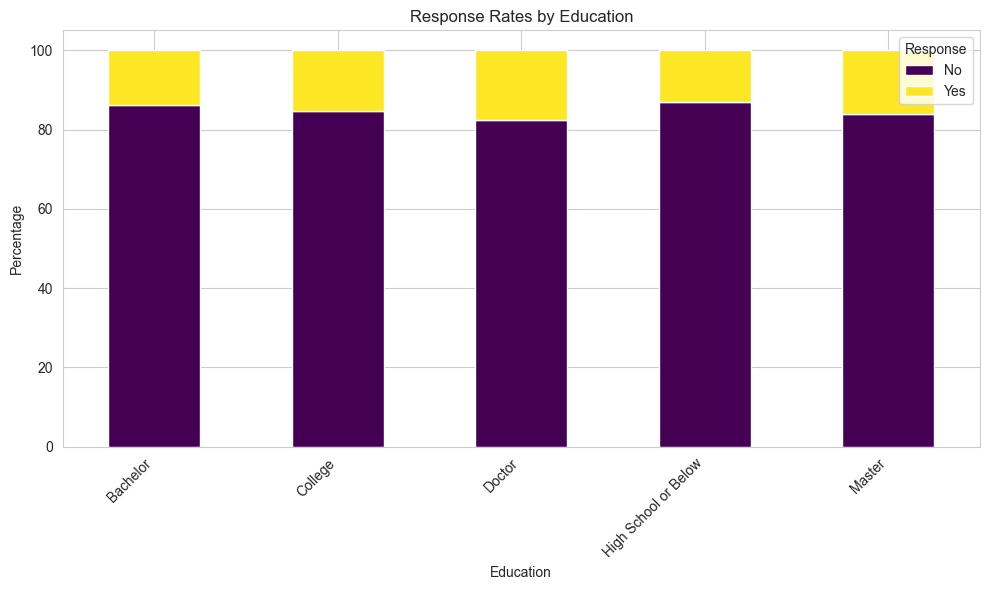


Analysis for Marital Status
Response Rates by Marital Status (%):
Response               No        Yes
Marital Status                      
Divorced        76.333090  23.666910
Married         86.862967  13.137033
Single          88.325902  11.674098


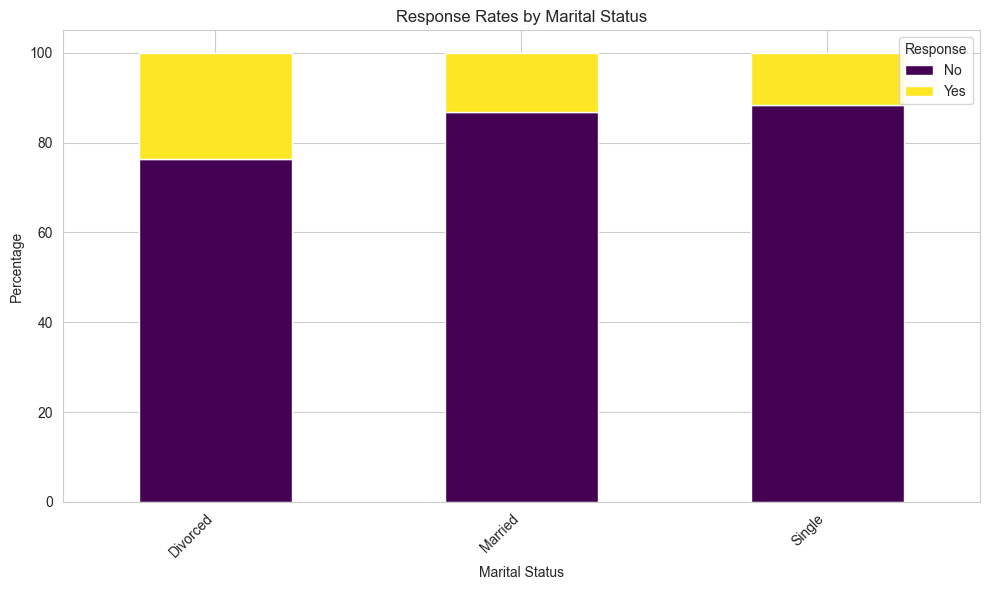


Analysis for Location Code
Response Rates by Location Code (%):
Response              No        Yes
Location Code                      
Rural          90.862944   9.137056
Suburban       82.557536  17.442464
Urban          91.276865   8.723135


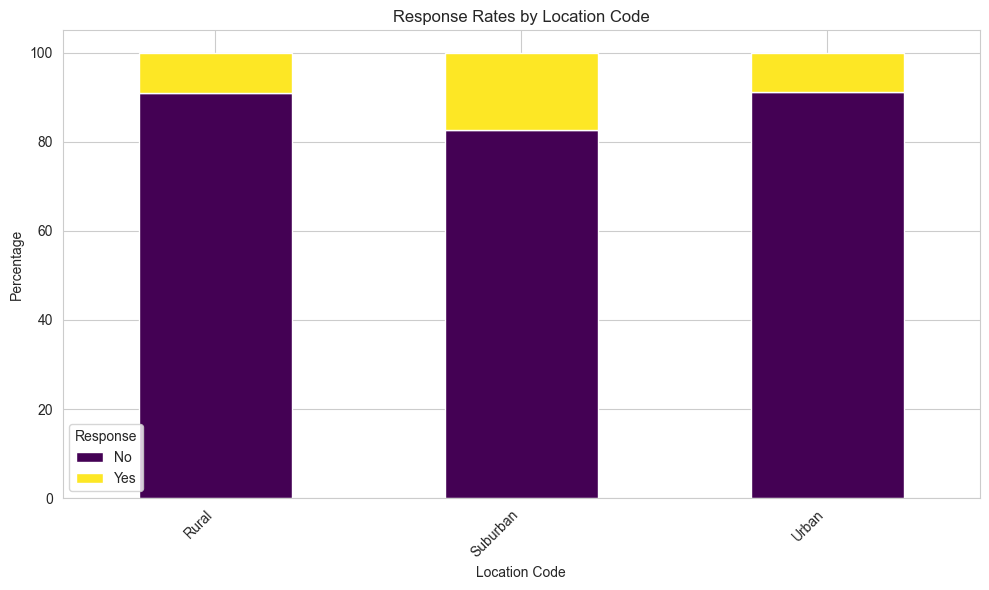


Analysis for State
Response Rates by State (%):
Response           No        Yes
State                           
Arizona     85.731063  14.268937
California  85.523810  14.476190
Nevada      85.941043  14.058957
Oregon      85.544022  14.455978
Washington  86.340852  13.659148


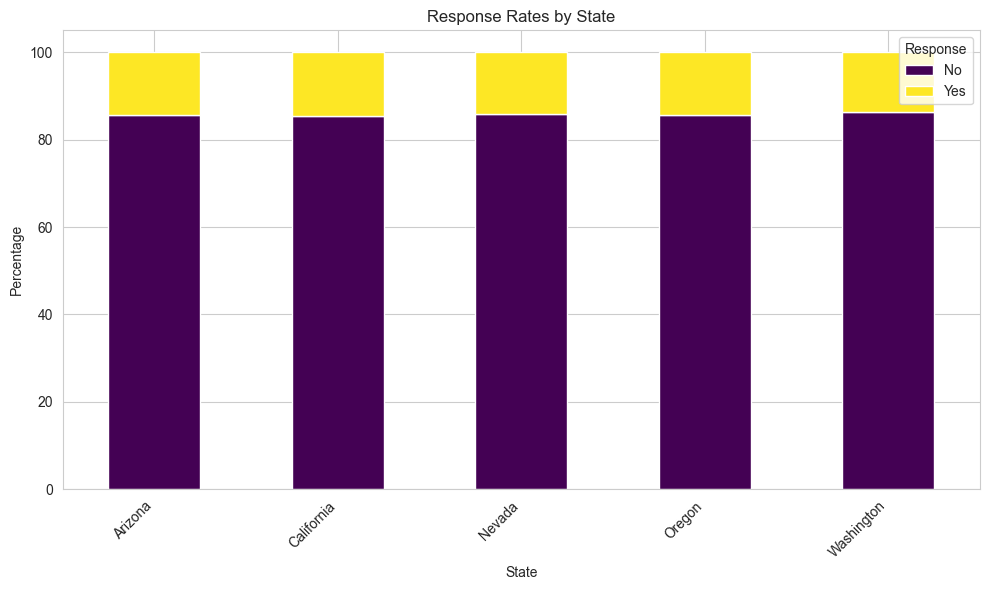


Analysis for Income (Binned)
Response Rates by Income Group (%):
Response                     No        Yes
Income_Binned_Labels                      
(-99.982, 19996.2]    87.319479  12.680521
(19996.2, 39992.4]    82.058047  17.941953
(39992.4, 59988.6]    87.532468  12.467532
(59988.6, 79984.8]    83.939602  16.060398
(79984.8, 99981.0]    88.867188  11.132812


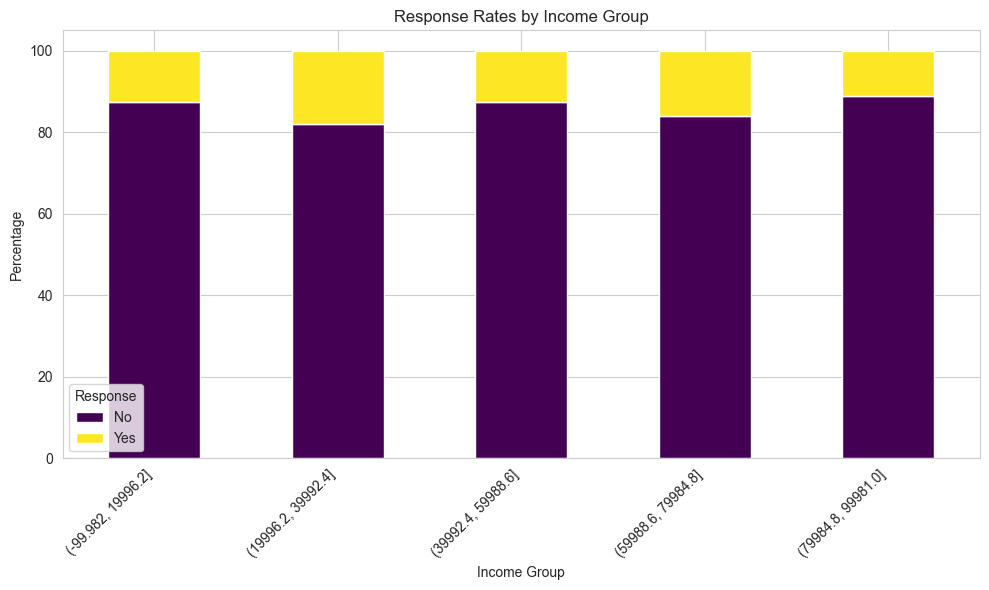

In [15]:
# Cross-tabulation analysis for protected attributes vs Response
if 'df' in locals():
    # Safety check: ensure protected attributes are defined
    if 'protected_attributes_categorical' not in locals():
        protected_attributes_categorical = ['Gender', 'EmploymentStatus', 'Education', 'Marital Status', 'Location Code', 'State']
    if 'protected_attributes_numerical' not in locals():
        protected_attributes_numerical = ['Income']
    
    print("="*60)
    print("CROSS-TABULATION ANALYSIS: Protected Attributes vs Response")
    print("="*60)
    
    # Analyze categorical protected attributes
    for col in protected_attributes_categorical:
        if col in df.columns:
            print(f"\n{'='*60}")
            print(f"Analysis for {col}")
            print(f"{'='*60}")
            
            # Create crosstab
            crosstab_df = pd.crosstab(df[col], df['Response'], normalize='index') * 100
            print(f"Response Rates by {col} (%):")
            print(crosstab_df.to_string())
            
            # Visualize with stacked bar chart
            crosstab_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
            plt.title(f'Response Rates by {col}')
            plt.xlabel(col)
            plt.ylabel('Percentage')
            plt.xticks(rotation=45, ha='right')
            plt.legend(title='Response')
            plt.tight_layout()
            plt.show()
        else:
            print(f"Column '{col}' not found in DataFrame. Skipping.")
    
    # Handle numerical protected attribute 'Income' by binning
    if 'Income' in df.columns:
        print(f"\n{'='*60}")
        print("Analysis for Income (Binned)")
        print(f"{'='*60}")
        
        # Create income bins
        df['Income_Binned_Labels'] = pd.cut(df['Income'], bins=5, include_lowest=True).astype(str)
        
        # Create crosstab for binned income
        crosstab_income_df = pd.crosstab(df['Income_Binned_Labels'], df['Response'], normalize='index') * 100
        print("Response Rates by Income Group (%):")
        print(crosstab_income_df.to_string())
        
        # Visualize
        crosstab_income_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
        plt.title('Response Rates by Income Group')
        plt.xlabel('Income Group')
        plt.ylabel('Percentage')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Response')
        plt.tight_layout()
        plt.show()
        
        # Drop the temporary binned income column
        df.drop(columns=['Income_Binned_Labels'], inplace=True)
    else:
        print("Column 'Income' not found in DataFrame. Skipping.")
else:
    print("DataFrame 'df' not created. Cannot perform cross-tabulation analysis.")

## 6. Feature-Target Relationships

CORRELATION OF NUMERICAL FEATURES WITH RESPONSE
Response_Numerical               1.000000
Total Claim Amount               0.016877
Income                           0.011932
Monthly Premium Auto             0.010966
Months Since Policy Inception    0.002952
Customer Lifetime Value         -0.008930
Number of Open Complaints       -0.009881
Months Since Last Claim         -0.016597
Number of Policies              -0.020891


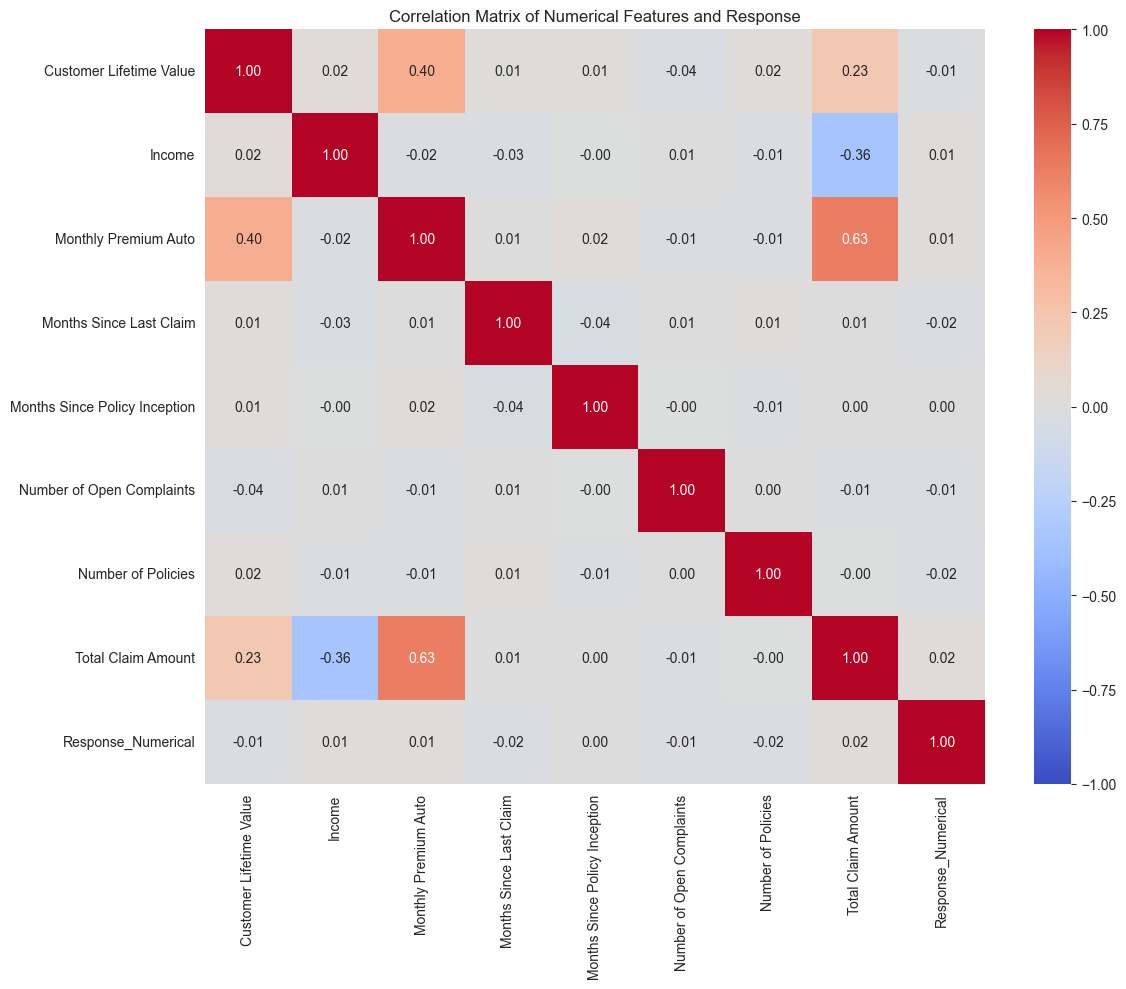


FEATURES WITH POTENTIALLY STRONG PREDICTIVE POWER
(Absolute correlation > 0.1):
Response_Numerical    1.0

POTENTIAL PROXIES FOR PROTECTED ATTRIBUTES
(Correlation with Income):
Income                1.000000
Total Claim Amount   -0.355254

⚠ Note: Features strongly correlated with Income may act as proxies for socioeconomic status.


In [16]:
# Feature-Target Relationship Analysis
if 'df' in locals():
    # Convert 'Response' to numerical (0 for No, 1 for Yes) for correlation analysis
    df_encoded = df.copy()
    df_encoded['Response_Numerical'] = df_encoded['Response'].map({'No': 0, 'Yes': 1})
    
    numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
    # Ensure 'Response_Numerical' is in the list
    if 'Response_Numerical' not in numerical_cols:
        numerical_cols.append('Response_Numerical')
    
    # Calculate correlations with 'Response_Numerical'
    relevant_numerical_cols = [col for col in numerical_cols if col in df_encoded.columns]
    correlations = df_encoded[relevant_numerical_cols].corr()['Response_Numerical'].sort_values(ascending=False)
    
    print("="*60)
    print("CORRELATION OF NUMERICAL FEATURES WITH RESPONSE")
    print("="*60)
    print(correlations.to_string())
    
    # Visualize correlations with a heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(df_encoded[relevant_numerical_cols].corr(), annot=True, cmap='coolwarm', 
                fmt=".2f", center=0, vmin=-1, vmax=1)
    plt.title('Correlation Matrix of Numerical Features and Response')
    plt.tight_layout()
    
    # Optional: Save visualization (uncomment to save)
    # plt.savefig('../results/correlation_heatmap.png', dpi=300, bbox_inches='tight')
    # print("\n✓ Visualization saved to '../results/correlation_heatmap.png'")
    
    plt.show()
    
    print("\n" + "="*60)
    print("FEATURES WITH POTENTIALLY STRONG PREDICTIVE POWER")
    print("(Absolute correlation > 0.1):")
    print("="*60)
    strong_predictors = correlations[abs(correlations) > 0.1]
    print(strong_predictors.to_string())
    
    print("\n" + "="*60)
    print("POTENTIAL PROXIES FOR PROTECTED ATTRIBUTES")
    print("(Correlation with Income):")
    print("="*60)
    if 'Income' in relevant_numerical_cols:
        income_correlations = df_encoded[relevant_numerical_cols].corr()['Income'].sort_values(ascending=False)
        print(income_correlations[abs(income_correlations) > 0.2].to_string())  # Show only moderate+ correlations
        print("\n⚠ Note: Features strongly correlated with Income may act as proxies for socioeconomic status.")
else:
    print("DataFrame 'df' not created. Cannot perform feature-target relationship analysis.")

## 7. Summary Statistics

Overall descriptive statistics for numerical and categorical features.

In [17]:
# Summary statistics for numerical and categorical features
if 'df' in locals():
    print("="*60)
    print("SUMMARY STATISTICS FOR NUMERICAL FEATURES")
    print("="*60)
    print(df.describe().to_string())
    
    print("\n" + "="*60)
    print("SUMMARY STATISTICS FOR CATEGORICAL FEATURES")
    print("="*60)
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # Create summary table for categorical features
    categorical_summary = []
    for col in categorical_cols:
        value_counts = df[col].value_counts()
        categorical_summary.append({
            'Column': col,
            'Unique Values': df[col].nunique(),
            'Most Frequent': value_counts.index[0] if len(value_counts) > 0 else None,
            'Most Frequent Count': value_counts.iloc[0] if len(value_counts) > 0 else 0,
            'Most Frequent %': (value_counts.iloc[0] / len(df) * 100) if len(value_counts) > 0 else 0
        })
    
    categorical_summary_df = pd.DataFrame(categorical_summary)
    print(categorical_summary_df.to_string(index=False))
else:
    print("DataFrame 'df' not created. Cannot generate summary statistics.")

SUMMARY STATISTICS FOR NUMERICAL FEATURES
       Customer Lifetime Value        Income  Monthly Premium Auto  Months Since Last Claim  Months Since Policy Inception  Number of Open Complaints  Number of Policies  Total Claim Amount
count              9134.000000   9134.000000           9134.000000              9134.000000                    9134.000000                9134.000000         9134.000000         9134.000000
mean               8004.940475  37657.380009             93.219291                15.097000                      48.064594                   0.384388            2.966170          434.088794
std                6870.967608  30379.904734             34.407967                10.073257                      27.905991                   0.910384            2.390182          290.500092
min                1898.007675      0.000000             61.000000                 0.000000                       0.000000                   0.000000            1.000000            0.099007
25%     

## 8. Key Findings & Preprocessing Recommendations

This section summarizes the key findings from the exploratory data analysis and provides recommendations for preprocessing.

### Data Quality Report

*   **Missing Values**: No missing values were found in the dataset, which simplifies the initial data cleaning process.
*   **Duplicate Records**: No duplicate records were found, indicating a clean dataset in terms of unique entries.
*   **Outliers**:
    *   **Income**: Contains a significant number of zero values (approximately 25%), which heavily skews its distribution. There are also high-income outliers.
    *   **Total Claim Amount**: Shows a right-skewed distribution with potential outliers on the higher end.
    *   **Customer Lifetime Value**: Exhibits a highly right-skewed distribution with a long tail, suggesting many high-value outliers.
    These outliers will need careful consideration (e.g., capping, transformation, or robust modeling techniques) during preprocessing.
*   **Data Types**: Verified as mostly appropriate.
    *   8 numerical columns (`float64`, `int64`)
    *   16 object (categorical) columns.
    *   'Effective To Date' is currently an `object` type and needs to be converted to `datetime` for proper temporal feature engineering.
*   **Cardinality**:
    *   'Customer' column has 9134 unique values, indicating it is a unique identifier. This column should be dropped as it provides no predictive power for the model.
    *   Other categorical columns have a reasonable number of unique values suitable for encoding.

### Demographic Imbalances Observed

Analysis of protected attributes revealed several demographic imbalances:

*   **Gender**: The distribution between 'Female' (F) and 'Male' (M) is relatively balanced.
*   **EmploymentStatus**: Heavily skewed towards 'Employed' (approx. 62%) and 'Unemployed' (approx. 25%), with 'Medical Leave', 'Disabled', and 'Retired' groups being significantly smaller.
*   **Education**: Skewed towards 'Bachelor' and 'College' degrees, with fewer individuals in 'High School or Below', 'Master', and 'Doctor' categories.
*   **Marital Status**: 'Married' individuals constitute the largest group (approx. 58%), followed by 'Single' and 'Divorced'.
*   **Location Code**: Predominantly 'Suburban' (approx. 63%), with 'Rural' and 'Urban' areas having fewer representatives.
*   **State**: 'California' and 'Oregon' are the most represented states, while 'Washington' and 'Nevada' have smaller populations in the dataset.
*   **Income**: The distribution is highly skewed, with a large concentration of zero incomes and a long tail extending to higher values.

These imbalances highlight the need for careful evaluation of model performance across different groups to ensure fairness.

### Initial Bias Patterns Identified (Cross-Tabulation Analysis with 'Response')

The cross-tabulation analysis of protected attributes against the 'Response' (target) variable revealed initial patterns that could indicate bias:

*   **EmploymentStatus**: Shows **extremely significant disparities**. The 'Retired' group has a dramatically higher 'Yes' response rate of **72.34%**, which is far above all other groups. 'Medical Leave' (18.06%) and 'Disabled' (17.78%) also show elevated rates. In contrast, 'Employed' has 13.27% and 'Unemployed' has only 8.55% 'Yes' response rates. The Retired group's response rate is over 8 times higher than Unemployed, indicating a critical fairness concern that requires immediate attention.
*   **Marital Status**: Reveals **substantial differences**. 'Divorced' individuals have the highest 'Yes' response rate at **23.67%**, followed by 'Married' (13.14%) and 'Single' (11.67%). The Divorced group's rate is more than double that of Single individuals, representing a significant disparity.
*   **Location Code**: Shows notable differences. 'Suburban' customers have a 'Yes' response rate of **17.44%**, which is nearly double that of 'Urban' (8.72%) and 'Rural' (9.14%) customers. This represents a substantial geographic disparity.
*   **Education**: Shows moderate differences. 'Doctor' (17.54%), 'Master' (16.19%), and 'College' (15.22%) degrees have higher 'Yes' response rates compared to 'Bachelor' (13.76%) and 'High School or Below' (13.04%). The differences are less pronounced than other attributes but still notable.
*   **Income**: Binned income analysis indicates that middle-income groups show higher 'Yes' response rates: (19996.2, 39992.4] has **17.94%** and (59988.6, 79984.8] has **16.06%**. In contrast, the lowest income bin (-99.982, 19996.2] has 12.68% and the highest bin (79984.8, 99981.0] has 11.13%. The middle-income groups have approximately 1.5 times the response rate of the extremes.
*   **Gender**: Shows minimal difference. 'Male' customers have a 'Yes' response rate of **14.48%** compared to 'Female' customers (14.17%). The difference is negligible (0.31 percentage points).
*   **State**: Shows very similar response rates across all states, ranging from 13.66% (Washington) to 14.48% (California). The differences are minimal and likely not significant.

These patterns suggest that certain demographic groups are more likely to respond 'Yes', which could lead to biased outcomes if not addressed.

### Feature-Target Relationships

*   **Numerical Features**: The correlation analysis between numerical features and the 'Response' target variable (converted to numerical) showed very weak linear relationships. The highest absolute correlations were around 0.01-0.02 (e.g., 'Total Claim Amount', 'Income', 'Monthly Premium Auto'). This indicates that individual numerical features, in isolation, are not strong linear predictors of the 'Response'.
*   **Potential Proxy Relationships**: 'Income' showed a moderate negative correlation with 'Total Claim Amount' (-0.35). While not a direct proxy for protected groups in the traditional sense, this inverse relationship is noteworthy. Further analysis might be needed to understand if 'Total Claim Amount' can indirectly reflect socioeconomic status or contribute to disparate impact.

### Preprocessing Recommendations

Based on the EDA, the following preprocessing steps are recommended:

1.  **Target Variable ('Response') Imbalance**:
    *   The 'Response' variable is highly imbalanced with a majority-to-minority ratio of **5.98** (85.7% 'No' vs 14.3% 'Yes').
    *   **Recommendation**: Address this imbalance using techniques such as oversampling the minority class (e.g., SMOTE), undersampling the majority class, or using class weights in model training.
    *   **Evaluation Metrics**: Prioritize metrics robust to imbalance, such as F1-score, Precision, Recall, and AUC-ROC, over simple accuracy.

2.  **Categorical Feature Encoding**:
    *   All categorical features (excluding 'Customer' and 'Effective To Date') will require encoding.
    *   **Recommendation**: Use appropriate encoding strategies like One-Hot Encoding for nominal features and Label Encoding or Ordinal Encoding for ordinal features, based on further domain knowledge or experimentation.

3.  **'Effective To Date' Column**:
    *   Currently an `object` type.
    *   **Recommendation**: Convert this column to `datetime` objects. Extract useful temporal features such as 'year', 'month', 'day of week', 'day of month', or 'days until policy expiration' (if policy expiration info is available/derivable), and then drop the original column.

4.  **'Customer' Column**:
    *   Identified as a unique identifier with no predictive value.
    *   **Recommendation**: Drop this column from the dataset before model training.

5.  **Outlier Treatment**:
    *   **Recommendation**: For 'Customer Lifetime Value', 'Income', and 'Total Claim Amount', explore strategies like capping (e.g., at the 95th or 99th percentile) or applying transformations (e.g., log transformation) to mitigate the impact of extreme outliers. Robust scaling methods can also be considered. The zero-income values might need special handling (e.g., imputation or treated as a separate category) if they represent a distinct group.

6.  **Fairness Considerations**:
    *   The identified demographic imbalances and disparate response rates across protected attributes indicate **critical fairness issues**, particularly:
        *   **EmploymentStatus**: The 'Retired' group has a 72.34% 'Yes' response rate (over 8x higher than 'Unemployed' at 8.55%). This extreme disparity requires immediate attention and investigation.
        *   **Marital Status**: 'Divorced' individuals have a 23.67% 'Yes' response rate (over 2x higher than 'Single' at 11.67%).
        *   **Location Code**: 'Suburban' customers have nearly double the response rate (17.44%) compared to 'Urban' (8.72%) and 'Rural' (9.14%) customers.
        *   **Education** and **Income** groups also show notable but less extreme disparities.
    *   **Recommendation**: During model development, prioritize monitoring fairness metrics (e.g., demographic parity, equal opportunity) across these protected groups, with special attention to EmploymentStatus and Marital Status. Consider using fair-aware machine learning techniques (e.g., fairness constraints, post-processing) to mitigate these biases. The extreme disparities suggest that these attributes may be strong predictors that could lead to discriminatory outcomes if not properly addressed.

**Next Steps:**
- Proceed to `01_preprocessing.ipynb` for data cleaning and preparation, incorporating these recommendations.